<a href="https://colab.research.google.com/github/dhavala-ts/SEED_Hackathon_Team40/blob/main/PD_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/PD__dataset.csv')


Skewness of Alpha_Synuclein: 0.0304


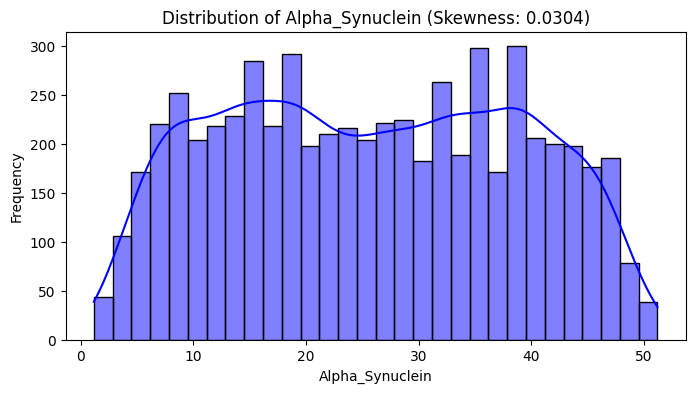

Skewness of Dopamine: 0.0153


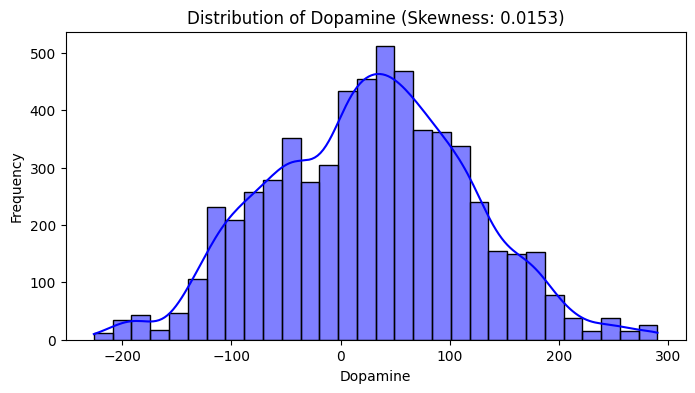

Skewness of Gyrometer_X: -3.2743


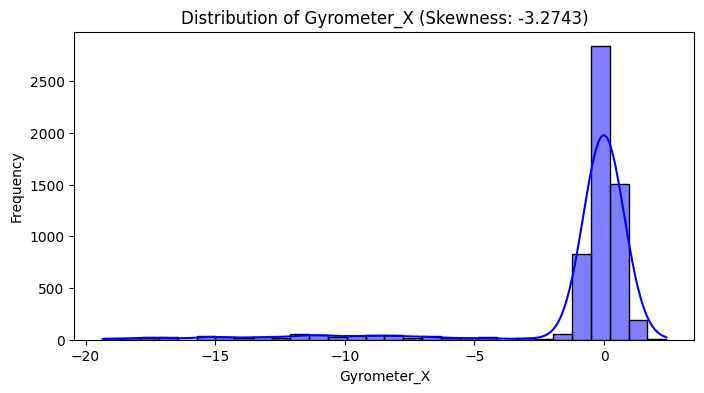

Skewness of Gyrometer_Y: -3.5556


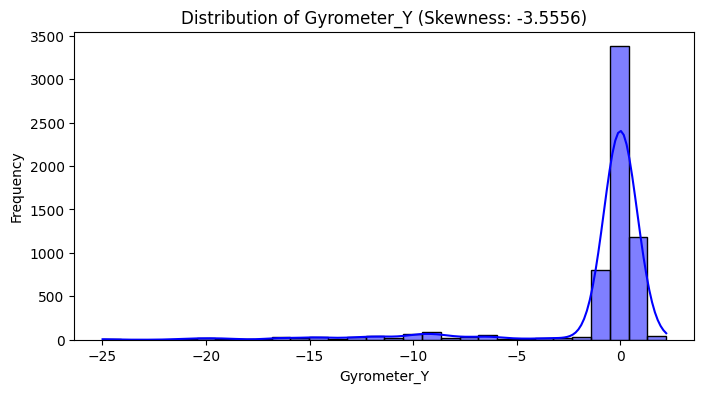

Skewness of Gyrometer_Z: -3.3614


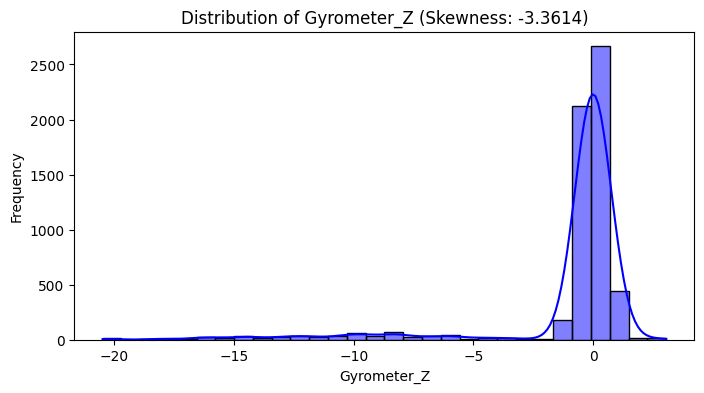

Skewness of SpO2: 0.1117


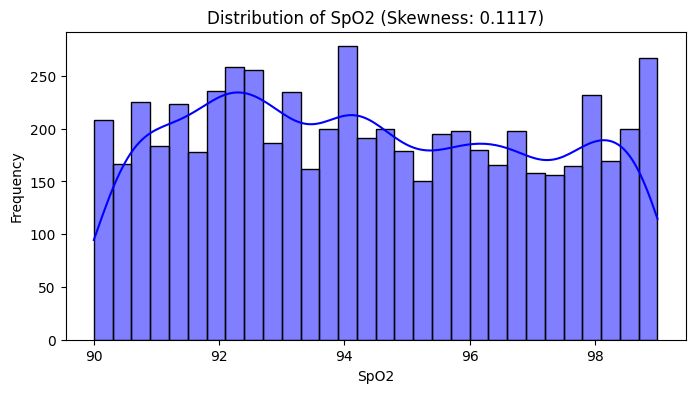

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Check skewness for each feature in the dataset, excluding 'choking' and 'Fall_Detected'
for column in data.select_dtypes(include=['float', 'int']).columns:
    if column not in ['choking', 'Fall_Detected']:
        col_skewness = skew(data[column])
        print(f'Skewness of {column}: {col_skewness:.4f}')

        # Plot distribution
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column} (Skewness: {col_skewness:.4f})')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Features to normalize
X = data[['SpO2', 'Dopamine', 'Alpha_Synuclein', 'Gyrometer_X', 'Gyrometer_Y', 'Gyrometer_Z']]

# Initialize the MinMaxScaler to normalize the features
scaler = MinMaxScaler()

# Fit and transform the data
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Check normalization of features
print("\nChecking normalized data:")
for column in X_normalized.columns:
    print(f'{column} - Min: {X_normalized[column].min():.4f}, Max: {X_normalized[column].max():.4f}')
    if X_normalized[column].min() == 0 and X_normalized[column].max() == 1:
        print(f'{column} looks normalized.')
    else:
        print(f'{column} is not normalized.')

# Display the normalized dataset
print("\nNormalized Features:")
print(X_normalized.head())



Checking normalized data:
SpO2 - Min: 0.0000, Max: 1.0000
SpO2 looks normalized.
Dopamine - Min: 0.0000, Max: 1.0000
Dopamine looks normalized.
Alpha_Synuclein - Min: 0.0000, Max: 1.0000
Alpha_Synuclein looks normalized.
Gyrometer_X - Min: 0.0000, Max: 1.0000
Gyrometer_X is not normalized.
Gyrometer_Y - Min: 0.0000, Max: 1.0000
Gyrometer_Y looks normalized.
Gyrometer_Z - Min: 0.0000, Max: 1.0000
Gyrometer_Z looks normalized.

Normalized Features:
       SpO2  Dopamine  Alpha_Synuclein  Gyrometer_X  Gyrometer_Y  Gyrometer_Z
0  0.162908  0.619229         0.093386     0.915677     0.928041     0.894486
1  0.350584  0.429975         0.143841     0.875535     0.917200     0.911311
2  0.552162  0.548973         0.024858     0.900560     0.901218     0.883468
3  0.433270  0.506372         0.029562     0.896674     0.962144     0.893717
4  0.163605  0.278669         0.062900     0.899730     0.911024     0.894979


In [4]:
# Features (X)
X = data[['SpO2', 'Dopamine', 'Alpha_Synuclein']].values

# Target variable (y) including both choking and fall detection
y = data[['choking', 'Fall_Detected']].values

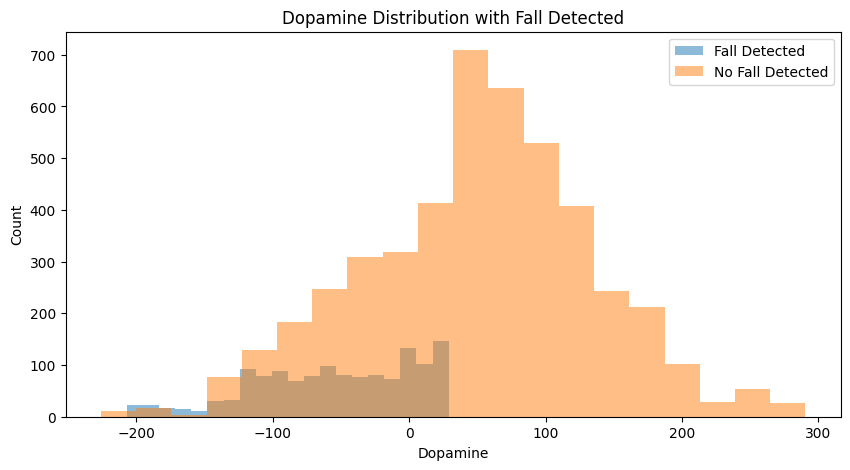

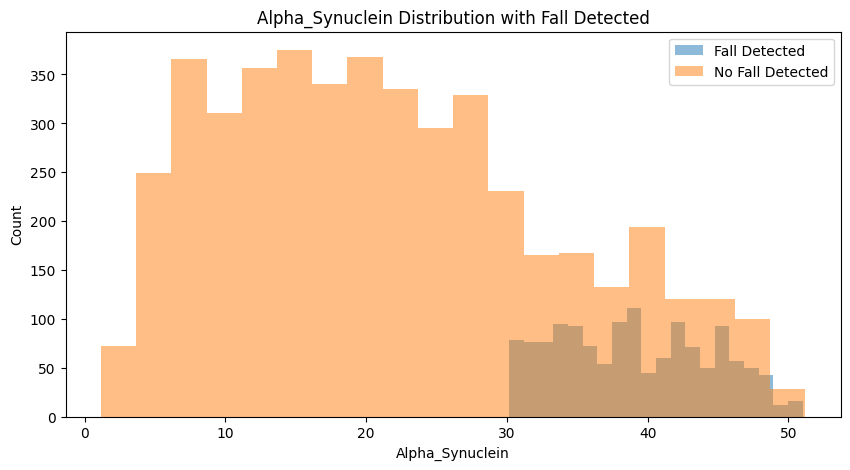

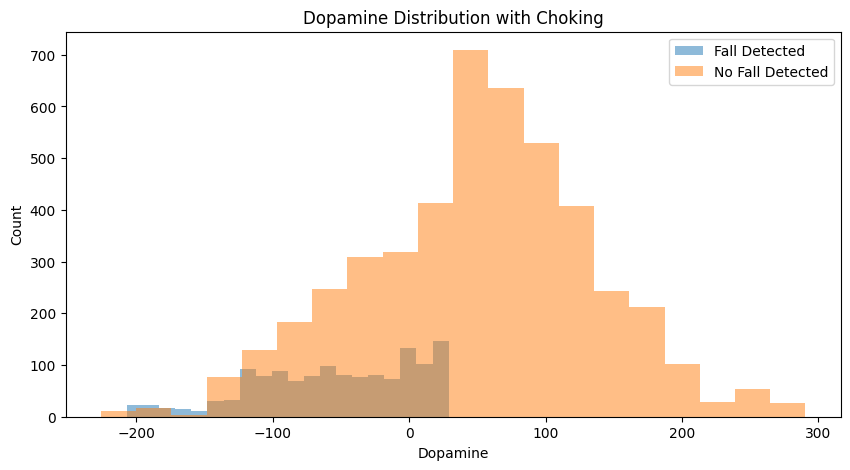

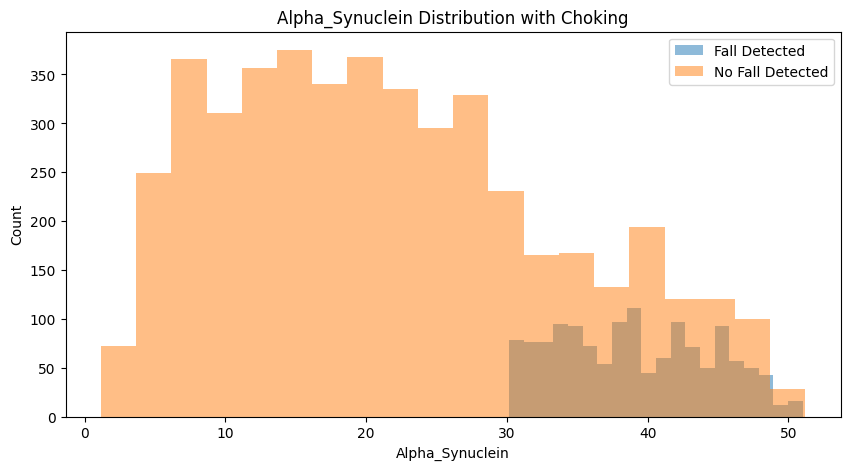

In [5]:
import matplotlib.pyplot as plt

def create_histogram(data, feature, title):
    plt.figure(figsize=(10, 5))
    bins = 20  # Adjust the number of bins as needed
    plt.hist(data[data['Fall_Detected'] == 1][feature], bins=bins, alpha=0.5, label='Fall Detected')
    plt.hist(data[data['Fall_Detected'] == 0][feature], bins=bins, alpha=0.5, label='No Fall Detected')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Dopamine distribution with Fall_Detected
create_histogram(data, 'Dopamine', 'Dopamine Distribution with Fall Detected')

# Alpha_Synuclein distribution with Fall_Detected
create_histogram(data, 'Alpha_Synuclein', 'Alpha_Synuclein Distribution with Fall Detected')

# Dopamine distribution with Choking
create_histogram(data, 'Dopamine', 'Dopamine Distribution with Choking')

# Alpha_Synuclein distribution with Choking
create_histogram(data, 'Alpha_Synuclein', 'Alpha_Synuclein Distribution with Choking')

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data for both choking and fall detection
X_choking = data[['Dopamine', 'Alpha_Synuclein', 'SpO2']]
y_choking = data['choking']
X_fall = data[['Dopamine', 'Alpha_Synuclein', 'Gyrometer_X']]
y_fall = data['Fall_Detected']

# Split data into train and test sets for choking prediction
X_train_choking, X_test_choking, y_train_choking, y_test_choking = train_test_split(
    X_choking, y_choking, test_size=0.2, random_state=42
)

# Split data into train and test sets for fall detection prediction
X_train_fall, X_test_fall, y_train_fall, y_test_fall = train_test_split(
    X_fall, y_fall, test_size=0.2, random_state=42
)

# Initialize and train a logistic regression model for choking prediction
clf_choking = LogisticRegression(max_iter=1000, random_state=42)
clf_choking.fit(X_train_choking, y_train_choking)
clf_fall = LogisticRegression(max_iter=1000, random_state=42)
clf_fall.fit(X_train_fall, y_train_fall)
accuracy_choking = clf_choking.score(X_test_choking, y_test_choking)
accuracy_fall = clf_fall.score(X_test_fall, y_test_fall)

print(f'Final Test Accuracy for Choking: {accuracy_choking:.4f}')
print(f'Final Test Accuracy for Fall Detection: {accuracy_fall:.4f}')

Final Test Accuracy for Choking: 0.9017
Final Test Accuracy for Fall Detection: 0.9308


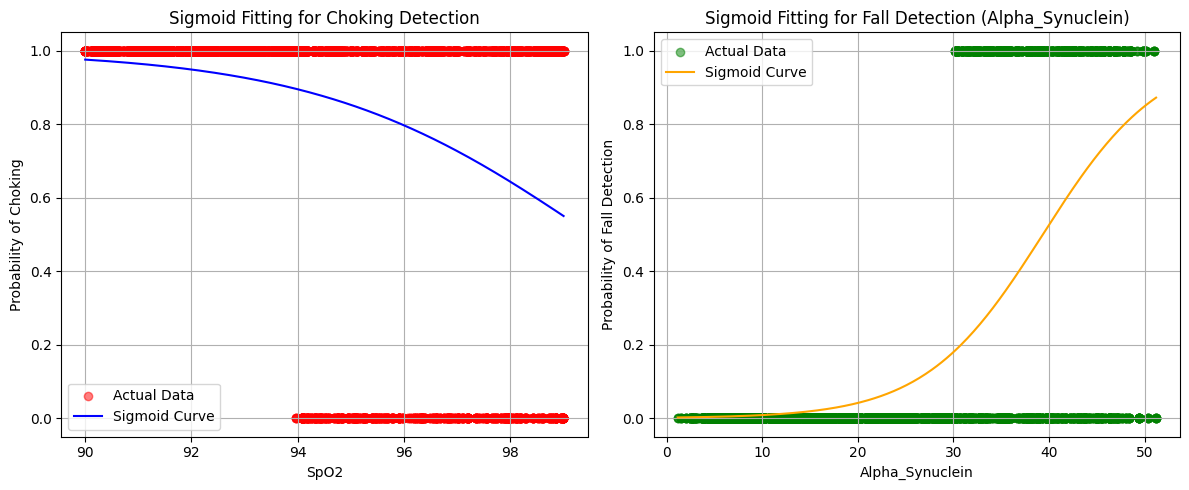

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming your dataset is in arrays `X` (features) and `y` (labels)
# For choking detection: Use 'SpO2' as the feature
X_choking_feature = X[:, 0].reshape(-1, 1)  # Assuming 'SpO2' is the first column
y_choking = y[:, 0]  # Assuming 'Choking' is the first target

# For fall detection: Use 'Alpha_Synuclein' as the feature
# Replace column index to select 'Alpha_Synuclein'
X_fall_feature = X[:, 2].reshape(-1, 1)  # Assuming 'Alpha_Synuclein' is the second column
y_fall = y[:, 1]  # Assuming 'Fall_Detected' is the second target

# Logistic Regression Models
clf_choking = LogisticRegression(max_iter=1000, random_state=42)
clf_choking.fit(X_choking_feature, y_choking)

clf_fall = LogisticRegression(max_iter=1000, random_state=42)
clf_fall.fit(X_fall_feature, y_fall)

# Generate a range of values for each feature to plot the sigmoid curve
X_choking_range = np.linspace(X_choking_feature.min(), X_choking_feature.max(), 300).reshape(-1, 1)
X_fall_range = np.linspace(X_fall_feature.min(), X_fall_feature.max(), 300).reshape(-1, 1)

# Predicted probabilities
y_choking_probs = clf_choking.predict_proba(X_choking_range)[:, 1]
y_fall_probs = clf_fall.predict_proba(X_fall_range)[:, 1]

# Plotting for choking detection
plt.figure(figsize=(12, 5))

# Choking Detection Plot
plt.subplot(1, 2, 1)
plt.scatter(X_choking_feature, y_choking, color='red', label='Actual Data', alpha=0.5)
plt.plot(X_choking_range, y_choking_probs, color='blue', label='Sigmoid Curve')
plt.title('Sigmoid Fitting for Choking Detection')
plt.xlabel('SpO2')
plt.ylabel('Probability of Choking')
plt.legend()
plt.grid(True)

# Fall Detection Plot (using Alpha_Synuclein)
plt.subplot(1, 2, 2)
plt.scatter(X_fall_feature, y_fall, color='green', label='Actual Data', alpha=0.5)
plt.plot(X_fall_range, y_fall_probs, color='orange', label='Sigmoid Curve')
plt.title('Sigmoid Fitting for Fall Detection (Alpha_Synuclein)')
plt.xlabel('Alpha_Synuclein')
plt.ylabel('Probability of Fall Detection')
plt.legend()
plt.grid(True)

# Display plots
plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 0.383730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343081
         Iterations 8


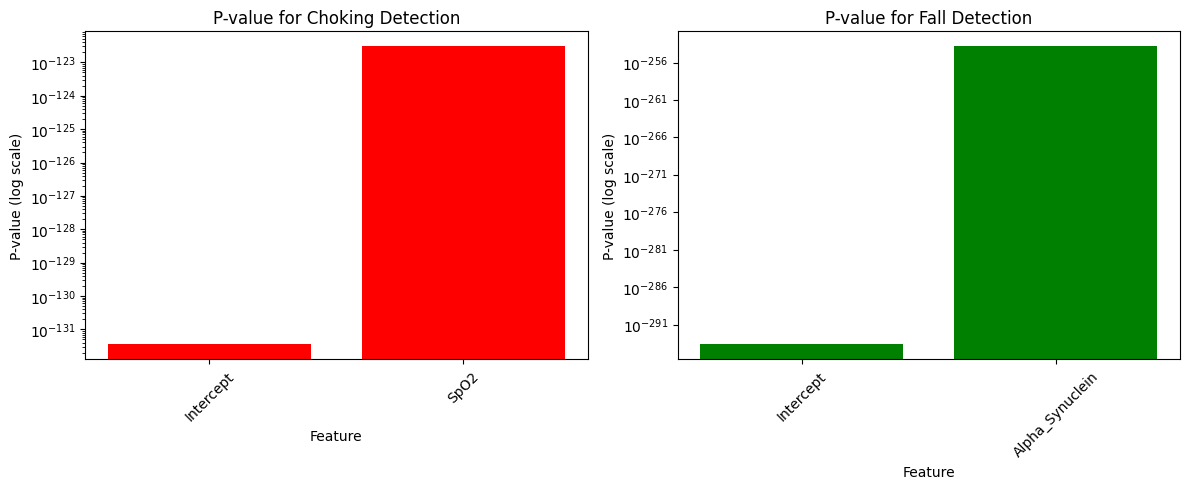

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd  # Import pandas for handling data

# For choking detection: Use 'SpO2' as the feature (update with correct index)
X_choking_feature = X[:, 0].reshape(-1, 1)  # Assuming 'SpO2' is in the first column
y_choking = y[:, 0]  # Assuming 'choking' is in the first target column

# For fall detection: Use 'Alpha_Synuclein' as the feature (update with correct index)
X_fall_feature = X[:, 2].reshape(-1, 1)  # Assuming 'Alpha_Synuclein' is in the third column
y_fall = y[:, 1]  # Assuming 'Fall_Detected' is in the second target column

# Choking Detection: Fit Logistic Regression
clf_choking = LogisticRegression(max_iter=1000, random_state=42)
clf_choking.fit(X_choking_feature, y_choking)

# Fall Detection: Fit Logistic Regression
clf_fall = LogisticRegression(max_iter=1000, random_state=42)
clf_fall.fit(X_fall_feature, y_fall)

# P-value calculation using Statsmodels for Choking Detection
X_choking_with_intercept = sm.add_constant(X_choking_feature)  # Add intercept to the model
model_choking = sm.Logit(y_choking, X_choking_with_intercept)
result_choking = model_choking.fit()
p_values_choking = pd.Series(result_choking.pvalues, index=["Intercept", "SpO2"])

# P-value calculation using Statsmodels for Fall Detection
X_fall_with_intercept = sm.add_constant(X_fall_feature)  # Add intercept to the model
model_fall = sm.Logit(y_fall, X_fall_with_intercept)
result_fall = model_fall.fit()
p_values_fall = pd.Series(result_fall.pvalues, index=["Intercept", "Alpha_Synuclein"])

# Plotting p-values for Choking and Fall Detection
plt.figure(figsize=(12, 5))

# Plot for Choking Detection
plt.subplot(1, 2, 1)
plt.bar(p_values_choking.index, p_values_choking.values, color='red')
plt.yscale('log')  # Log scale for better visualization of p-values
plt.title('P-value for Choking Detection')
plt.xlabel('Feature')
plt.ylabel('P-value (log scale)')
plt.xticks(rotation=45)

# Plot for Fall Detection
plt.subplot(1, 2, 2)
plt.bar(p_values_fall.index, p_values_fall.values, color='green')
plt.yscale('log')  # Log scale for better visualization of p-values
plt.title('P-value for Fall Detection')
plt.xlabel('Feature')
plt.ylabel('P-value (log scale)')
plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()


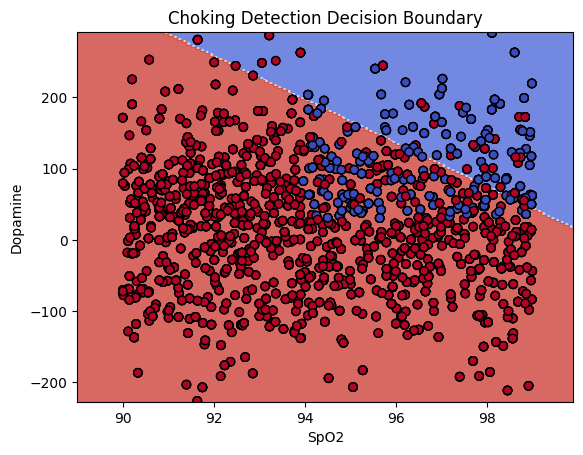

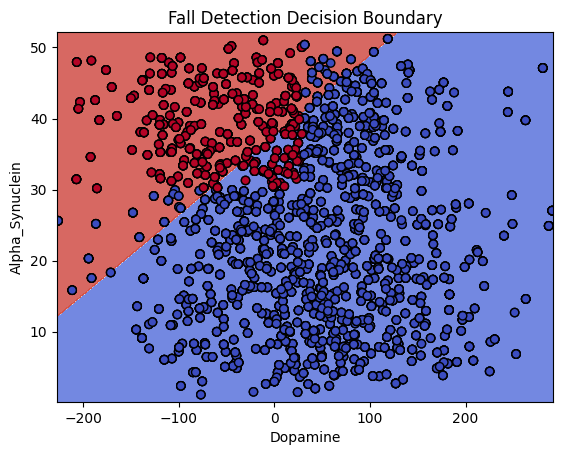

In [14]:
def plot_decision_boundary_2D(model, X, y, feature_names, title):
    """
    Plots the decision boundary for logistic regression in 2D.

    Args:
    - model: Trained Logistic Regression model.
    - X: Feature data (2D, two features only).
    - y: Target variable.
    - feature_names: Names of the features for labeling axes.
    - title: Title of the plot.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Select two features for each task for 2D visualization
X_choking_2D = X[:, [0, 1]]  # Using 'SpO2' and 'Dopamine'
X_fall_2D = X[:, [1, 2]]     # Using 'Dopamine' and 'Alpha_Synuclein'

# Train new models for 2D visualization
clf_choking_2D = LogisticRegression(max_iter=1000, random_state=42)
clf_choking_2D.fit(X_choking_2D, y[:, 0])

clf_fall_2D = LogisticRegression(max_iter=1000, random_state=42)
clf_fall_2D.fit(X_fall_2D, y[:, 1])

# Plot decision boundaries
plot_decision_boundary_2D(clf_choking_2D, X_choking_2D, y[:, 0],
                          ['SpO2', 'Dopamine'], 'Choking Detection Decision Boundary')

plot_decision_boundary_2D(clf_fall_2D, X_fall_2D, y[:, 1],
                          ['Dopamine', 'Alpha_Synuclein'], 'Fall Detection Decision Boundary')


Final Test Accuracy for Choking: 0.9017
Final Test Accuracy for Fall Detection: 0.9308


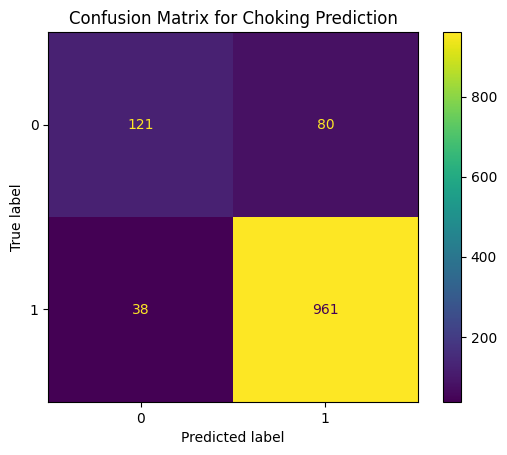

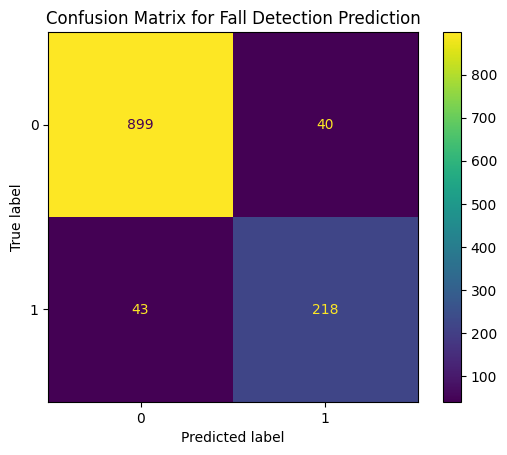

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare data for both choking and fall detection
X_choking = data[['Dopamine', 'Alpha_Synuclein', 'SpO2']]
y_choking = data['choking']
X_fall = data[['Dopamine', 'Alpha_Synuclein', 'Gyrometer_X']]
y_fall = data['Fall_Detected']

# Split data into train and test sets for choking prediction
X_train_choking, X_test_choking, y_train_choking, y_test_choking = train_test_split(
    X_choking, y_choking, test_size=0.2, random_state=42
)

# Split data into train and test sets for fall detection prediction
X_train_fall, X_test_fall, y_train_fall, y_test_fall = train_test_split(
    X_fall, y_fall, test_size=0.2, random_state=42
)

# Initialize and train a logistic regression model for choking prediction
clf_choking = LogisticRegression(max_iter=1000, random_state=42)
clf_choking.fit(X_train_choking, y_train_choking)

# Initialize and train a logistic regression model for fall detection prediction
clf_fall = LogisticRegression(max_iter=1000, random_state=42)
clf_fall.fit(X_train_fall, y_train_fall)

# Get accuracy for both tasks
accuracy_choking = clf_choking.score(X_test_choking, y_test_choking)
accuracy_fall = clf_fall.score(X_test_fall, y_test_fall)

print(f'Final Test Accuracy for Choking: {accuracy_choking:.4f}')
print(f'Final Test Accuracy for Fall Detection: {accuracy_fall:.4f}')

# Calculate confusion matrix for choking prediction
y_pred_choking = clf_choking.predict(X_test_choking)
conf_matrix_choking = confusion_matrix(y_test_choking, y_pred_choking)

# Calculate confusion matrix for fall detection prediction
y_pred_fall = clf_fall.predict(X_test_fall)
conf_matrix_fall = confusion_matrix(y_test_fall, y_pred_fall)

# Display confusion matrix for choking prediction
disp_choking = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_choking)
disp_choking.plot()
plt.title('Confusion Matrix for Choking Prediction')
plt.show()

# Display confusion matrix for fall detection prediction
disp_fall = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_fall)
disp_fall.plot()
plt.title('Confusion Matrix for Fall Detection Prediction')
plt.show()


In [16]:
pip install shap

In [17]:
import shap
explainer_choking = shap.Explainer(clf_choking, X_train_choking)

sample_idx_choking = 0  # You can choose any sample index
sample_choking = X_test_choking.iloc[sample_idx_choking]

# Generate SHAP explanation for choking prediction
shap_values_choking = explainer_choking.shap_values(sample_choking)

background_pred_choking = clf_choking.predict_proba(X_train_choking)

# Compute the base value for choking prediction
base_value_choking = np.mean(background_pred_choking[:, 1])  # Assuming it's a binary classification model

# Create an Explanation object for choking prediction
shap_explanation_choking = shap.Explanation(values=shap_values_choking, base_values=base_value_choking, data=sample_choking)

# Plot the explanation for choking prediction
shap.plots.waterfall(shap_explanation_choking, show=False)
plt.title('SHAP Explanation for Choking Prediction')
plt.savefig('shap_explanation_choking.png')
plt.close()

# Initialize SHAP explainer for fall detection prediction
explainer_fall = shap.Explainer(clf_fall, X_train_fall)

# Choose a sample from the test set to explain for fall detection prediction
sample_idx_fall = 0  # You can choose any sample index
sample_fall = X_test_fall.iloc[sample_idx_fall]

# Generate SHAP explanation for fall detection prediction
shap_values_fall = explainer_fall.shap_values(sample_fall)

# Get model's prediction on the background dataset for fall detection prediction
background_pred_fall = clf_fall.predict_proba(X_train_fall)

# Compute the base value for fall detection prediction
base_value_fall = np.mean(background_pred_fall[:, 1])  # Assuming it's a binary classification model

# Create an Explanation object for fall detection prediction
shap_explanation_fall = shap.Explanation(values=shap_values_fall, base_values=base_value_fall, data=sample_fall)

# Plot the explanation for fall detection prediction
shap.plots.waterfall(shap_explanation_fall, show=False)
plt.title('SHAP Explanation for Fall Detection Prediction')
plt.savefig('shap_explanation_fall.png')
plt.close()

In [18]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
import os

def send_email(subject, body, attachment_path, to_email):
    # Email credentials (replace with your own)
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    smtp_username = 'snehaaa.bhat@gmail.com'
    smtp_password = 'mnae lykn krcb rpms'
    to_email = 'snehaaa.bhat@gmail.com'


    # Create message
    msg = MIMEMultipart()
    msg['From'] = smtp_username
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # Attach SHAP explanation image
    if os.path.exists(attachment_path):
        with open(attachment_path, 'rb') as attachment:
            image_data = attachment.read()
            msg_attachment = MIMEImage(image_data)
            msg_attachment.add_header('Content-Disposition', 'attachment', filename=os.path.basename(attachment_path))
            msg.attach(msg_attachment)
    else:
        print(f"Error: Attachment {attachment_path} not found.")
        return  # Exit function if attachment not found

    # Connect to SMTP server and send email
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()
        server.login(smtp_username, smtp_password)
        server.sendmail(smtp_username, to_email, msg.as_string())

# Example usage for fall prediction alert
subject_fall = 'Fall Prediction Alert'
body_fall = 'A fall event has been predicted. Please take immediate action.\n\nExplanation attached.'
attachment_path_fall = '/content/shap_explanation_fall.png'
to_email = 'snehaaa.bhat@gmail.com'

send_email(subject_fall, body_fall, attachment_path_fall, to_email)

# Example usage for choking prediction alert
subject_choking = 'Choking Prediction Alert'
body_choking = 'A choking event has been predicted. Please take immediate action.\n\nExplanation attached.'
attachment_path_choking = '/content/shap_explanation_choking.png'
to_email = 'snehaaa.bhat@gmail.com'

send_email(subject_choking, body_choking, attachment_path_choking, to_email)
print("Prediction email sent successfully")


Prediction email sent successfully


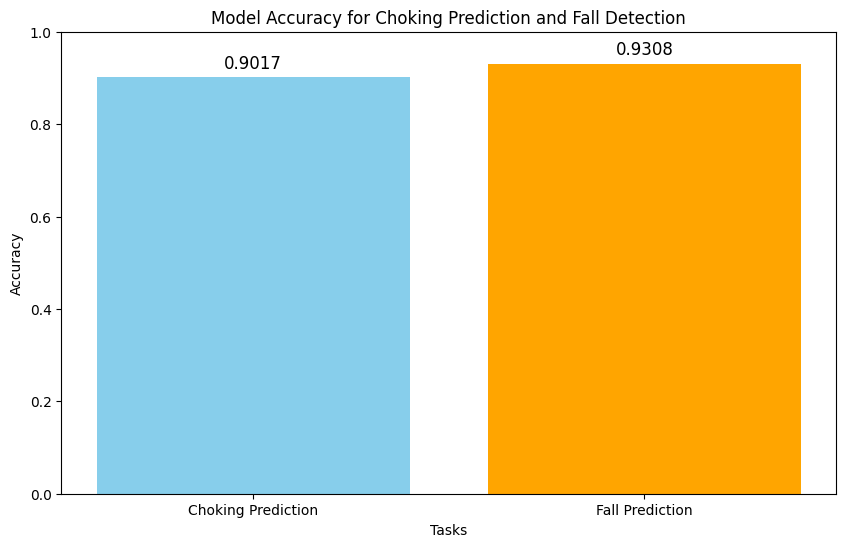

In [19]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = [accuracy_choking, accuracy_fall]
tasks = ['Choking Prediction', 'Fall Prediction']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(tasks, accuracies, color=['skyblue', 'orange'])
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1

# Adding titles and labels
plt.title('Model Accuracy for Choking Prediction and Fall Detection')
plt.xlabel('Tasks')
plt.ylabel('Accuracy')

# Annotate accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12)

# Show plot
plt.show()
